# Room Occupancy Estimation Data Set

The experimental testbed for occupancy estimation.
Five different types of non-intrusive sensors were used in this experiment: temperature, light, sound, CO2 and digital passive infrared (PIR).

Attribute Information: Time: HH:MM:SS, Temperature: In degree Celsius, Light: In Lux, Sound: In Volts (amplifier output read by ADC), CO2: In PPM, CO2 Slope: Slope of CO2 values taken in a sliding window, PIR: Binary value conveying motion detection, Room_Occupancy_Count: Ground Truth

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'/Users/krishnendhuk/Downloads/Occupancy_Estimation.csv')

In [3]:
df

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0            34        53        40      0.08      0.19      0.06      0.06   
1            33        53        40      0.93      0.05      0.06      0.06   
2            34        53        40      0.43      0.11      0.08      0.06   
3            34        53        40      0.41      0.10      0.10      0.09   
4            34        54        40      0.18      0.06      0.06      0.06   
...         ...       ...       ...       ...       ...       ...       ...   
10124         7        33        22      0.09      0.04      0.06      0.08   
10125         7        34        22      0.07      0.05      0.05      0.08   
10126         7        34        22      0.11      0.05      0.06      0.08   
10127         7        34        22      0.08      0.08      0.10      0.08   
10128         7        34        22      0.08      0.05      0.06      0.08   

       S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0         390      0.769231       0       0                     1  
1         390      0.646154       0       0                     1  
2         390      0.519231       0       0                     1  
3         390      0.388462       0       0                     1  
4         390      0.253846       0       0                     1  
...       ...           ...     ...     ...                   ...  
10124     345      0.000000       0       0                     0  
10125     345      0.000000       0       0                     0  
10126     345      0.000000       0       0                     0  
10127     345      0.000000       0       0                     0  
10128     345      0.000000       0       0                     0  

[10129 rows x 19 columns]

# Exploratory Data Analysis and Visualization

# 1) STATISTICAL DESCRIPTION OF DATA

In [4]:
df.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

In [5]:
df.tail()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
10124         7        33        22      0.09      0.04      0.06      0.08   
10125         7        34        22      0.07      0.05      0.05      0.08   
10126         7        34        22      0.11      0.05      0.06      0.08   
10127         7        34        22      0.08      0.08      0.10      0.08   
10128         7        34        22      0.08      0.05      0.06      0.08   

       S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
10124     345           0.0       0       0                     0  
10125     345           0.0       0       0                     0  
10126     345           0.0       0       0                     0  
10127     345           0.0       0       0                     0  
10128     345           0.0       0       0                     0

In [6]:
df.shape

(10129, 19)

In [7]:
df.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2  S5_CO2_Slope        S6_PIR  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean       0.158119      0.103840    460.860401     -0.004830      0.090137   
std        0.413637      0.120683    199.964940      1.164990      0.286392   
min        0.040000      0.050000    345.000000     -6.296154      0.000000   
25%        0.060000      0.060000    355.000000     -0.046154      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      8.980769      1.000000   

             S7_PIR  Room_Occupancy_Count  
count  10129.000000          10129.000000  
mean       0.079574              0.398559  
std        0.270645              0.893633  
min        0.000000              0.000000  
25%        0.000000              0.000000  
50%        0.000000              0.000000  
75%        0.000000              0.000000  
max        1.000000              3.000000

In [8]:
df.nunique()

Date                        7
Time                    10129
S1_Temp                    24
S2_Temp                    69
S3_Temp                    29
S4_Temp                    27
S1_Light                   68
S2_Light                   82
S3_Light                  177
S4_Light                   75
S1_Sound                  231
S2_Sound                  185
S3_Sound                  258
S4_Sound                  106
S5_CO2                    186
S5_CO2_Slope             1579
S6_PIR                      2
S7_PIR                      2
Room_Occupancy_Count        4
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum() #there are no null values we can proceed with data preprocessing

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [11]:
df.isnull().values.any()# check if any null value is present

False

In [12]:
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [13]:
df['Time']

0        10:49:41
1        10:50:12
2        10:50:42
3        10:51:13
4        10:51:44
           ...   
10124    08:58:07
10125    08:58:37
10126    08:59:08
10127    08:59:39
10128    09:00:09
Name: Time, Length: 10129, dtype: object

In [14]:
print('Number of rooms having room count as zero is',round(df['Room_Occupancy_Count'].value_counts()[0]/len(df)*100,2))

Number of rooms having room count as zero is 81.23


In [15]:
df['Room_Occupancy_Count'] #each value counts of target function

0        1
1        1
2        1
3        1
4        1
        ..
10124    0
10125    0
10126    0
10127    0
10128    0
Name: Room_Occupancy_Count, Length: 10129, dtype: int64

In [16]:
df['Room_Occupancy_Count'].value_counts() #sorted value counts

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

In [17]:
df['Room_Occupancy_Count'].value_counts()/len(df)*100 #percentage of count room occupancy

0    81.232106
2     7.384737
3     6.851614
1     4.531543
Name: Room_Occupancy_Count, dtype: float64

In [18]:
round(df['Room_Occupancy_Count'].value_counts()/len(df)*100,2) #round-off value

0    81.23
2     7.38
3     6.85
1     4.53
Name: Room_Occupancy_Count, dtype: float64

In [19]:
print('Rooms having occupancy of zero',round(df['Room_Occupancy_Count'].value_counts()[0]/len(df)*100,2))# % round-off value
print('Rooms having occupancy of one',round(df['Room_Occupancy_Count'].value_counts()[1]/len(df)*100,2))# % round-off value
print('Rooms having occupancy of two',round(df['Room_Occupancy_Count'].value_counts()[2]/len(df)*100,2))# % round-off value
print('Rooms having occupancy of three',round(df['Room_Occupancy_Count'].value_counts()[3]/len(df)*100,2))# % round-off value

Rooms having occupancy of zero 81.23
Rooms having occupancy of one 4.53
Rooms having occupancy of two 7.38
Rooms having occupancy of three 6.85


We can say that the data is not balanced because the majority of the rooms (81.23%) have zero occupancy, which is significantly higher than the other categories. This indicates that the data is highly skewed towards the zero occupancy category, and the other categories are relatively underrepresented.

Therefore, after seeing our % of occupancy count , we can conclude that our data is not balanced. Now we need to make the set balanced.

# 2) PLOTS

In [20]:
import seaborn as sns

In [21]:
attributes = list(df)
attributes.remove('Room_Occupancy_Count')
attributes.remove('Time')
attributes.remove('Date')
attributes

['S1_Temp',
 'S2_Temp',
 'S3_Temp',
 'S4_Temp',
 'S1_Light',
 'S2_Light',
 'S3_Light',
 'S4_Light',
 'S1_Sound',
 'S2_Sound',
 'S3_Sound',
 'S4_Sound',
 'S5_CO2',
 'S5_CO2_Slope',
 'S6_PIR',
 'S7_PIR']

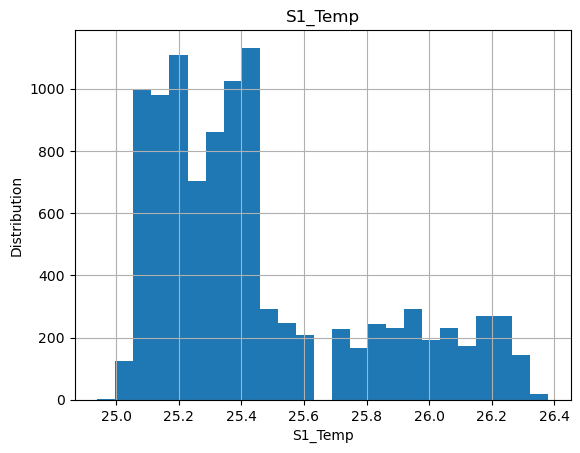

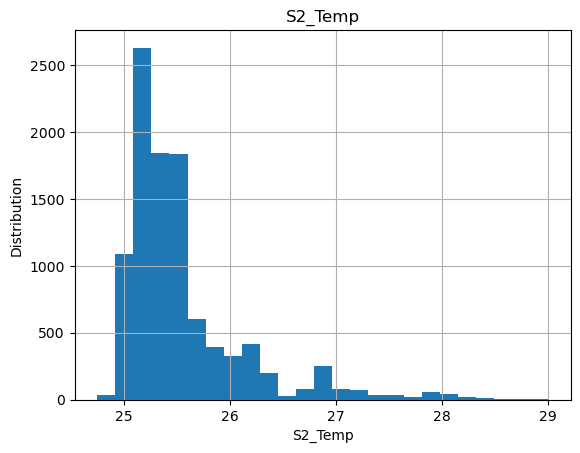

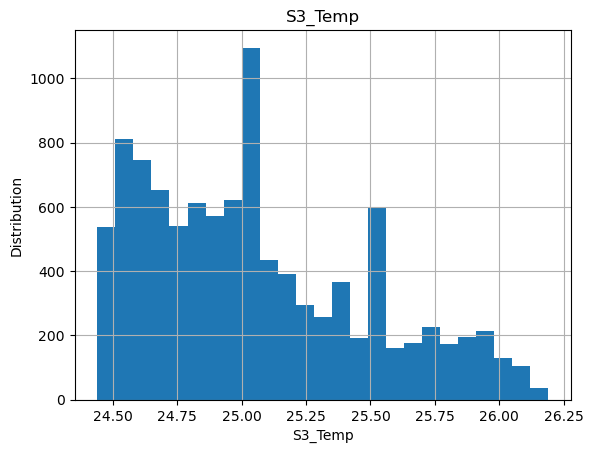

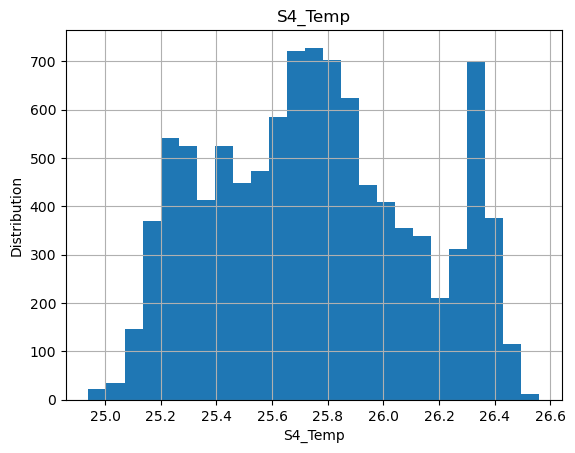

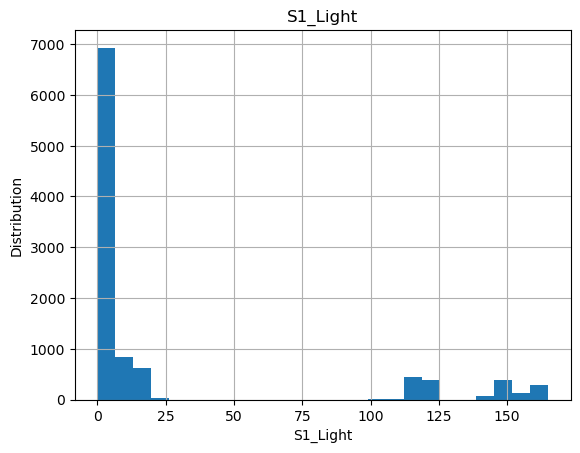

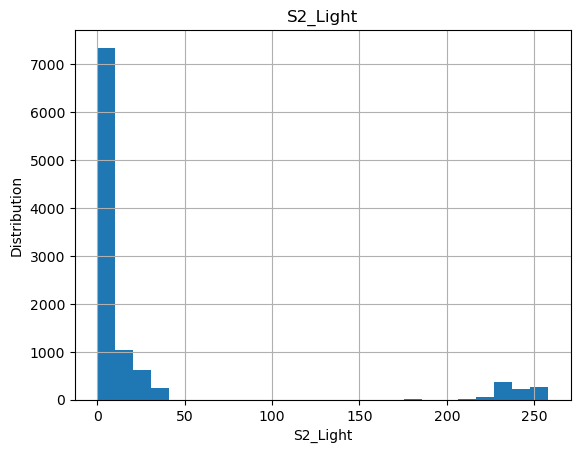

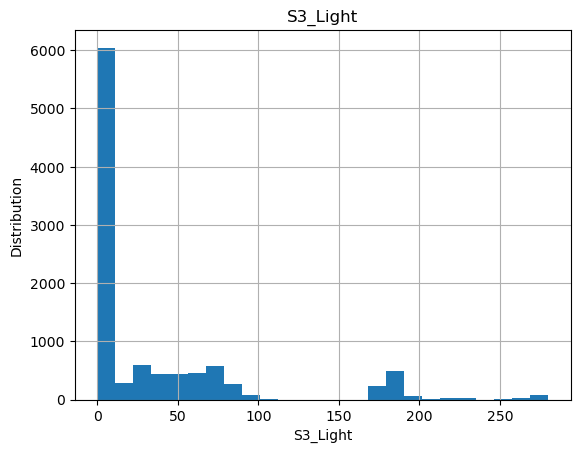

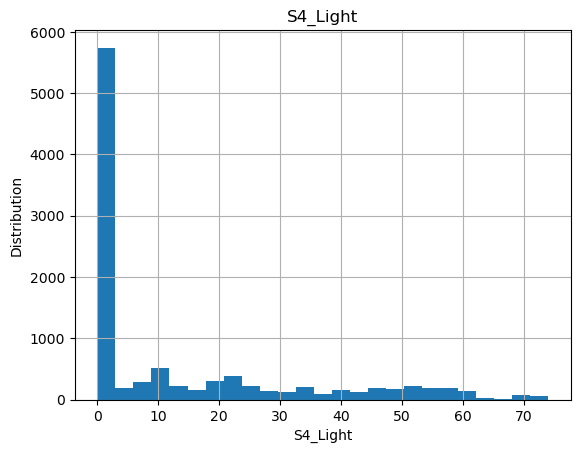

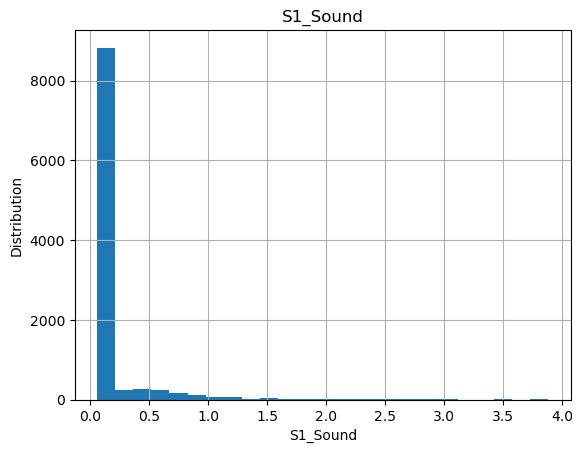

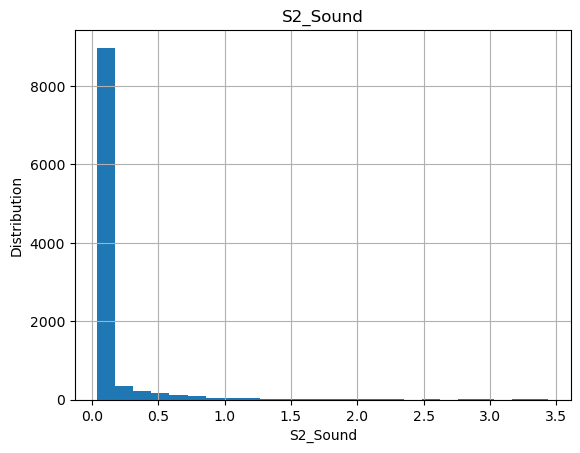

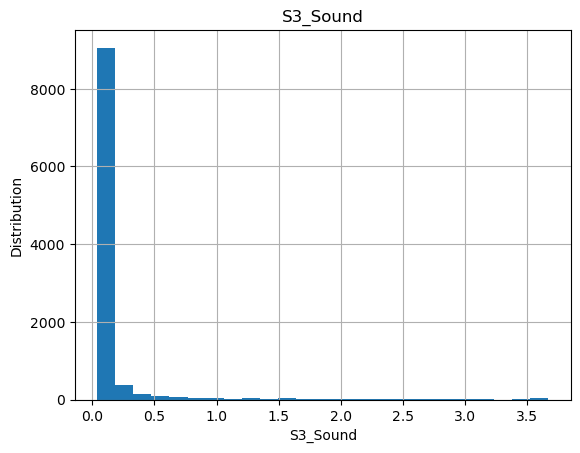

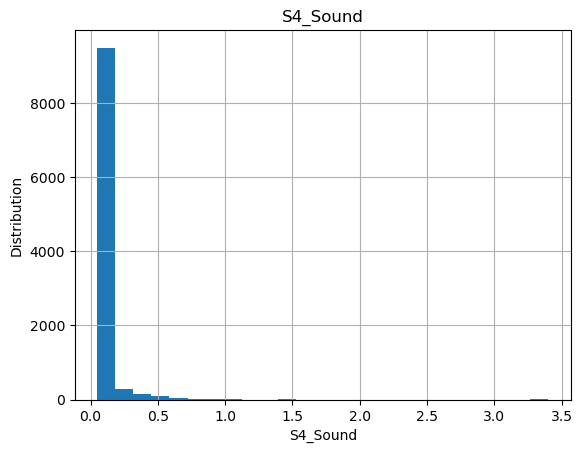

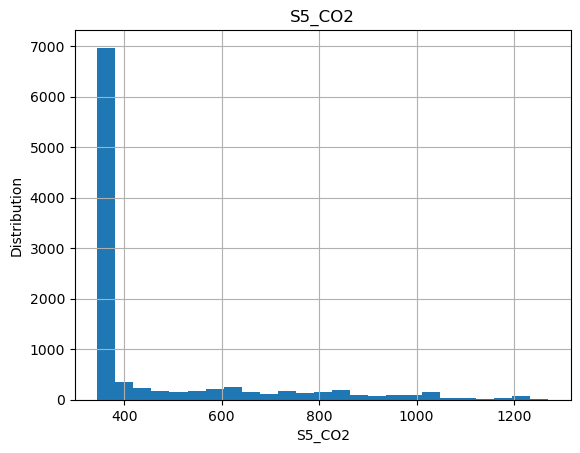

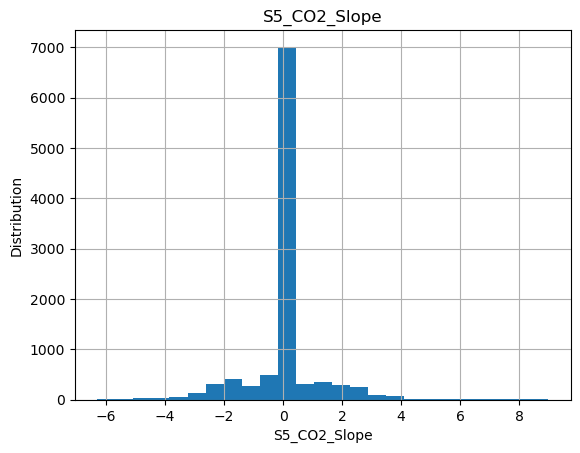

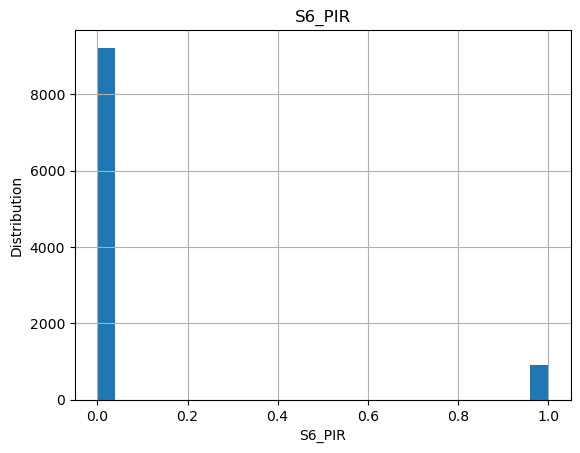

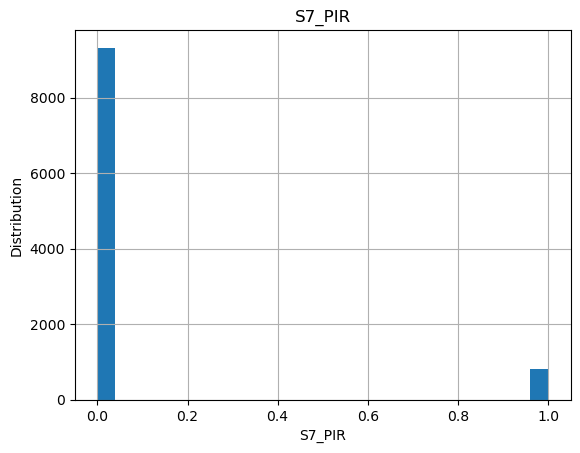

In [22]:
for attribute in attributes:
    df[attribute].hist(bins = 25)
    plt.xlabel(attribute)
    plt.ylabel('Distribution')
    plt.title(attribute)
    plt.show()

In [23]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd

# IQR
Q1 = np.percentile(df['S1_Temp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['S1_Temp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['S1_Temp'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['S1_Temp'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (10129, 19)
Outliers are: (array([ 761,  772,  775,  777,  778,  779,  780,  781,  782,  783,  784,
        785,  786,  787,  788,  789,  790,  791,  794,  795,  797,  798,
        800,  801,  805,  806,  808,  809,  810,  813,  814,  821,  842,
        844,  846,  847,  849,  850,  851,  852,  853,  854,  855,  856,
        857,  858,  859,  860,  861,  862,  863,  864,  865,  866,  867,
        868,  869,  870,  871,  872,  873,  874,  875,  876,  877,  878,
        879,  880,  881,  883,  884,  885,  886,  887,  888,  889,  890,
        891,  892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
        902,  903,  904,  905,  906,  907,  908,  909,  910,  911,  912,
        913,  914,  915,  916,  917,  918,  919,  920,  921,  922,  923,
        924,  925,  926,  927,  928,  929,  930,  931,  932,  933,  934,
        935,  936,  937,  938,  939,  940,  941,  942,  943,  944,  945,
        946,  947,  948,  949,  950,  951,  952,  953,  954,  955,  956,
        957,

In [24]:
Q1 = np.percentile(df['S2_Temp'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['S2_Temp'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['S2_Temp'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['S2_Temp'] <= (Q1-1.5*IQR))

''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (10129, 19)
Outliers are: (array([ 129,  130,  131,  132,  133,  134,  135,  136,  137,  138,  139,
        140,  141,  142,  143,  144,  145,  146,  147,  148,  149,  150,
        151,  152,  153,  154,  155,  156,  157,  158,  159,  160,  161,
        162,  163,  164,  165,  166,  167,  168,  169,  170,  171,  172,
        173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,
        184,  185,  186,  187,  188,  189,  190,  191,  192,  193,  194,
        195,  196,  197,  198,  199,  200,  201,  202,  203,  204,  205,
        206,  207,  208,  209,  210,  211,  212,  213,  214,  215,  216,
        217,  218,  219,  220,  221,  222,  223,  224,  225,  226,  227,
        228,  229,  230,  231,  232,  233,  234,  235,  236,  237,  238,
        239,  240,  241,  242,  243,  244,  245,  246,  247,  248,  249,
        250,  251,  252,  253,  254,  255,  256,  257,  258,  259,  260,
        261,  262,  263,  264,  265,  266,  267,  268,  269,  270,  271,
        272,

In [25]:
Q1 = np.percentile(df['S1_Sound'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['S1_Sound'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['S1_Sound'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['S1_Sound'] <= (Q1-1.5*IQR))

''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (10129, 19)
Outliers are: (array([    1,     2,     3, ...,  9051,  9076, 10126]),) (array([], dtype=int64),)


In [26]:
Q1 = np.percentile(df['S2_Sound'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['S2_Sound'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['S2_Sound'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['S2_Sound'] <= (Q1-1.5*IQR))

''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (10129, 19)
Outliers are: (array([    0,     2,     3, ...,  9075,  9076, 10127]),) (array([], dtype=int64),)


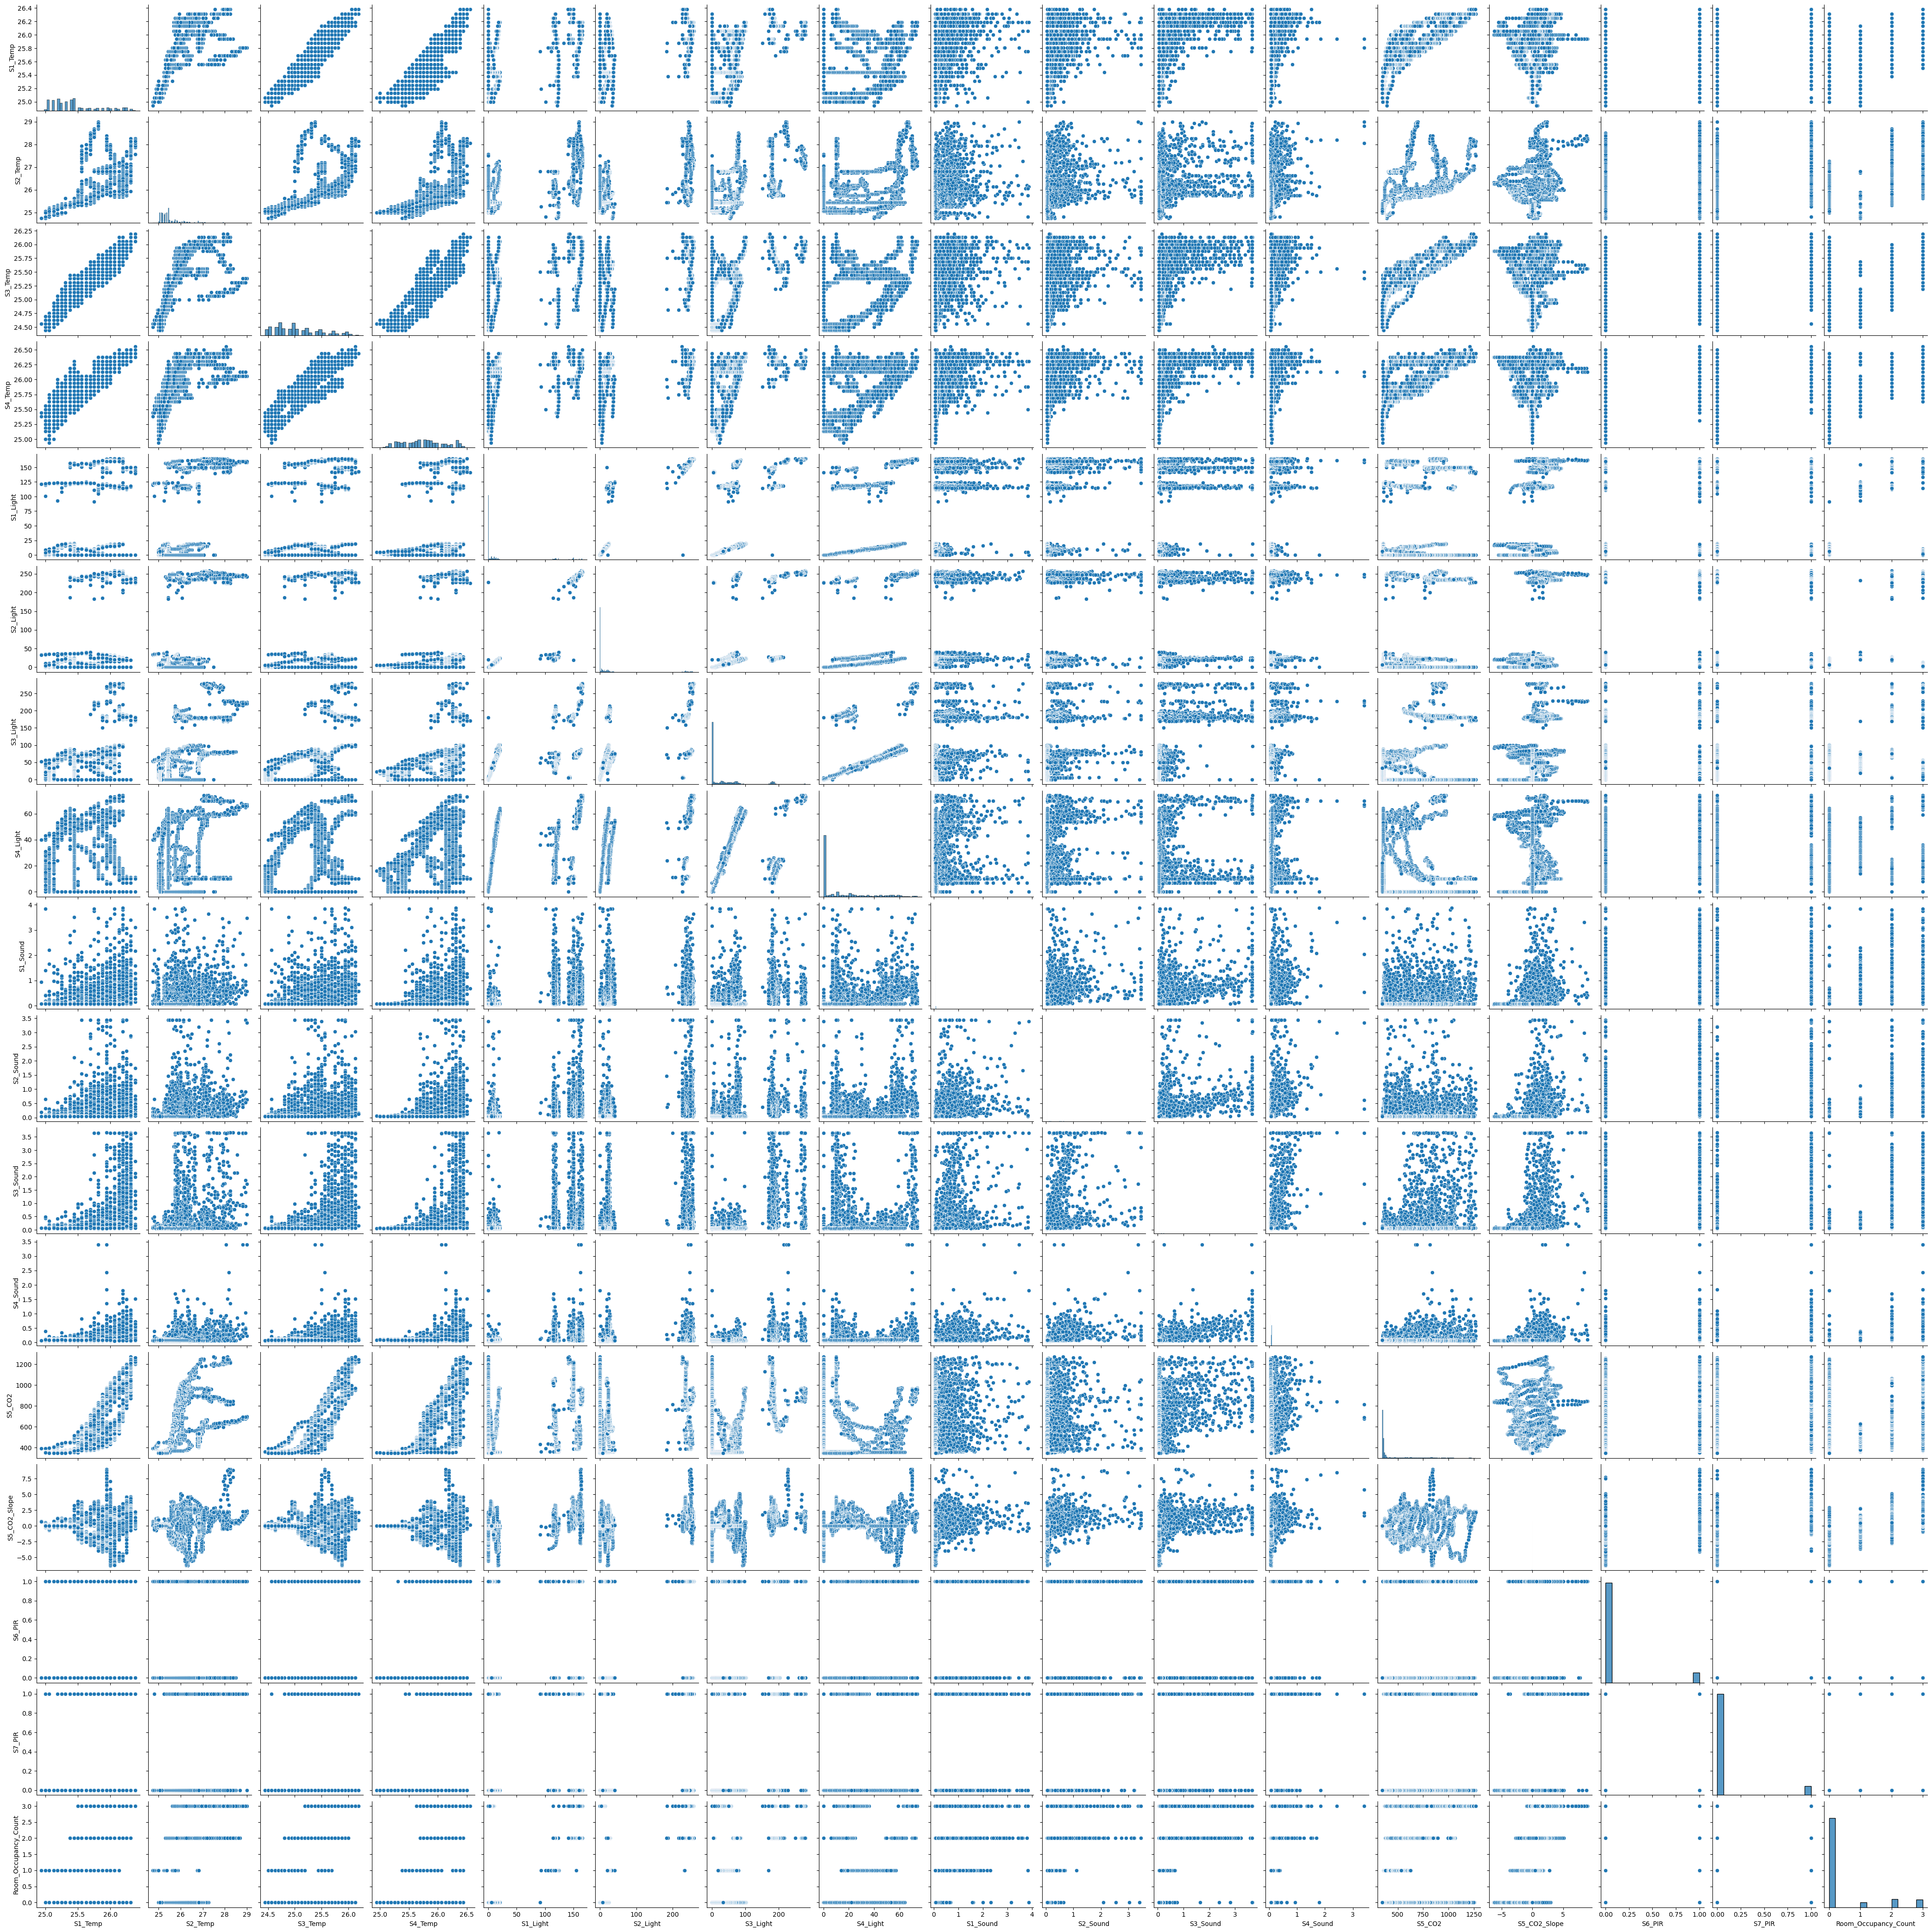

In [27]:
sns.pairplot(df) #Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

# Relationship Analysis


# 1) CORRELATION

In [28]:
df.corr()

S1_Temp   S2_Temp   S3_Temp   S4_Temp  S1_Light  \
S1_Temp               1.000000  0.799707  0.948839  0.855279  0.680743   
S2_Temp               0.799707  1.000000  0.765525  0.696581  0.639773   
S3_Temp               0.948839  0.765525  1.000000  0.885186  0.594311   
S4_Temp               0.855279  0.696581  0.885186  1.000000  0.581482   
S1_Light              0.680743  0.639773  0.594311  0.581482  1.000000   
S2_Light              0.548735  0.645987  0.500054  0.456350  0.842090   
S3_Light              0.645163  0.607349  0.642601  0.588459  0.816438   
S4_Light              0.212217  0.370897  0.301419  0.386871  0.510853   
S1_Sound              0.436099  0.438274  0.375183  0.355111  0.601166   
S2_Sound              0.391137  0.409545  0.344026  0.312594  0.534274   
S3_Sound              0.438769  0.427133  0.398177  0.340808  0.494080   
S4_Sound              0.355826  0.378724  0.326182  0.294939  0.441712   
S5_CO2                0.866718  0.743722  0.821308  0.650320  0.602740   
S5_CO2_Slope          0.137391  0.202547  0.095842  0.106208  0.498185   
S6_PIR                0.436363  0.476901  0.403355  0.340000  0.607159   
S7_PIR                0.474077  0.465884  0.460309  0.339037  0.545213   
Room_Occupancy_Count  0.700868  0.671263  0.652047  0.526509  0.849058   

                      S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  \
S1_Temp               0.548735  0.645163  0.212217  0.436099  0.391137   
S2_Temp               0.645987  0.607349  0.370897  0.438274  0.409545   
S3_Temp               0.500054  0.642601  0.301419  0.375183  0.344026   
S4_Temp               0.456350  0.588459  0.386871  0.355111  0.312594   
S1_Light              0.842090  0.816438  0.510853  0.601166  0.534274   
S2_Light              1.000000  0.709579  0.458914  0.503021  0.560630   
S3_Light              0.709579  1.000000  0.579484  0.502606  0.434859   
S4_Light              0.458914  0.579484  1.000000  0.293632  0.303949   
S1_Sound              0.503021  0.502606  0.293632  1.000000  0.560062   
S2_Sound              0.560630  0.434859  0.303949  0.560062  1.000000   
S3_Sound              0.439269  0.577151  0.169702  0.540736  0.529830   
S4_Sound              0.413932  0.473606  0.200793  0.557733  0.578635   
S5_CO2                0.566764  0.650829  0.148608  0.391903  0.333836   
S5_CO2_Slope          0.493281  0.447708  0.212718  0.335772  0.357235   
S6_PIR                0.554658  0.501836  0.324545  0.522015  0.485697   
S7_PIR                0.556797  0.577815  0.220196  0.463040  0.507231   
Room_Occupancy_Count  0.788764  0.793081  0.355715  0.573748  0.557853   

                      S3_Sound  S4_Sound    S5_CO2  S5_CO2_Slope    S6_PIR  \
S1_Temp               0.438769  0.355826  0.866718      0.137391  0.436363   
S2_Temp               0.427133  0.378724  0.743722      0.202547  0.476901   
S3_Temp               0.398177  0.326182  0.821308      0.095842  0.403355   
S4_Temp               0.340808  0.294939  0.650320      0.106208  0.340000   
S1_Light              0.494080  0.441712  0.602740      0.498185  0.607159   
S2_Light              0.439269  0.413932  0.566764      0.493281  0.554658   
S3_Light              0.577151  0.473606  0.650829      0.447708  0.501836   
S4_Light              0.169702  0.200793  0.148608      0.212718  0.324545   
S1_Sound              0.540736  0.557733  0.391903      0.335772  0.522015   
S2_Sound              0.529830  0.578635  0.333836      0.357235  0.485697   
S3_Sound              1.000000  0.696670  0.447220      0.318815  0.434225   
S4_Sound              0.696670  1.000000  0.330629      0.323519  0.394954   
S5_CO2                0.447220  0.330629  1.000000      0.069220  0.395265   
S5_CO2_Slope          0.318815  0.323519  0.069220      1.000000  0.368374   
S6_PIR                0.434225  0.394954  0.395265      0.368374  1.000000   
S7_PIR                0.536820  0.466848  0.473437      0.425346  0.571125   
Room_Occupancy_Count  0.531685 

<AxesSubplot:>

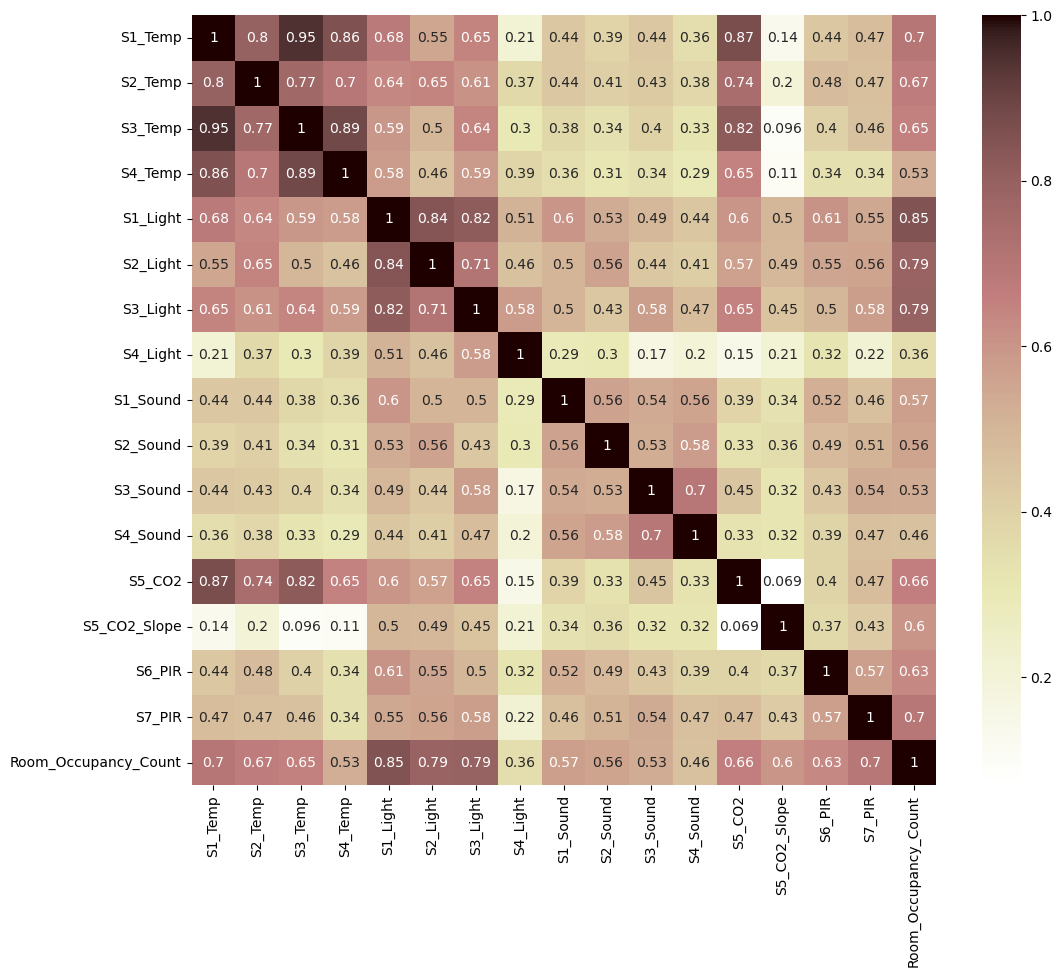

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='pink_r')


From the above heatmap, we can conclude that S1_Temp,S3_Temp and S1_Temp, S4_Temp are highly correlated ,so we need to remove either one of the attributes from each and proceed the prepocessing.

# 2) FEATURE SELECTION

In [30]:
data=df.drop(['S3_Temp','S4_Temp'],axis=1)
data

Date      Time  S1_Temp  S2_Temp  S1_Light  S2_Light  S3_Light  \
0      2017/12/22  10:49:41    24.94    24.75       121        34        53   
1      2017/12/22  10:50:12    24.94    24.75       121        33        53   
2      2017/12/22  10:50:42    25.00    24.75       121        34        53   
3      2017/12/22  10:51:13    25.00    24.75       121        34        53   
4      2017/12/22  10:51:44    25.00    24.75       121        34        54   
...           ...       ...      ...      ...       ...       ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13         6         7        33   
10125  2018/01/11  08:58:37    25.06    25.06         6         7        34   
10126  2018/01/11  08:59:08    25.13    25.06         6         7        34   
10127  2018/01/11  08:59:39    25.13    25.06         6         7        34   
10128  2018/01/11  09:00:09    25.13    25.06         6         7        34   

       S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  \
0            40      0.08      0.19      0.06      0.06     390      0.769231   
1            40      0.93      0.05      0.06      0.06     390      0.646154   
2            40      0.43      0.11      0.08      0.06     390      0.519231   
3            40      0.41      0.10      0.10      0.09     390      0.388462   
4            40      0.18      0.06      0.06      0.06     390      0.253846   
...         ...       ...       ...       ...       ...     ...           ...   
10124        22      0.09      0.04      0.06      0.08     345      0.000000   
10125        22      0.07      0.05      0.05      0.08     345      0.000000   
10126        22      0.11      0.05      0.06      0.08     345      0.000000   
10127        22      0.08      0.08      0.10      0.08     345      0.000000   
10128        22      0.08      0.05      0.06      0.08     345      0.000000   

       S6_PIR  S7_PIR  Room_Occupancy_Count  
0           0       0                     1  
1           0       0                     1  
2           0       0                     1  
3           0       0                     1  
4           0       0                     1  
...       ...     ...                   ...  
10124       0       0                     0  
10125       0       0                     0  
10126       0       0                     0  
10127       0       0                     0  
10128       0       0                     0  

[10129 rows x 17 columns]

<AxesSubplot:>

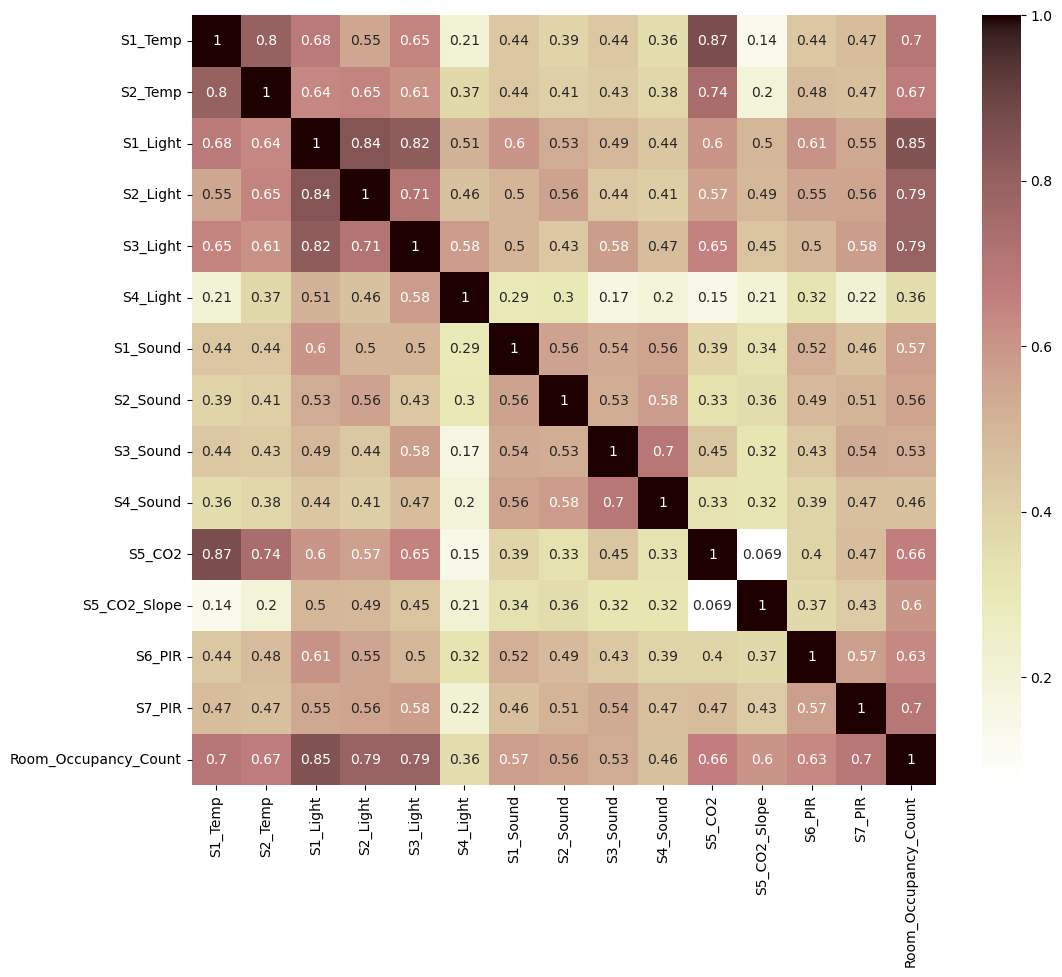

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='pink_r')

# NORMALIZATION

In [32]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# select the columns to normalize
cols_to_normalize = ['S1_Temp', 'S2_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']

# apply the scaler to the selected columns
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

In [33]:
data[cols_to_normalize]

S1_Temp   S2_Temp  S1_Light  S2_Light  S3_Light  S4_Light  S1_Sound  \
0      0.000000  0.000000  0.733333  0.131783  0.189286  0.540541  0.005236   
1      0.000000  0.000000  0.733333  0.127907  0.189286  0.540541  0.227749   
2      0.041667  0.000000  0.733333  0.131783  0.189286  0.540541  0.096859   
3      0.041667  0.000000  0.733333  0.131783  0.189286  0.540541  0.091623   
4      0.041667  0.000000  0.733333  0.131783  0.192857  0.540541  0.031414   
...         ...       ...       ...       ...       ...       ...       ...   
10124  0.083333  0.089412  0.036364  0.027132  0.117857  0.297297  0.007853   
10125  0.083333  0.072941  0.036364  0.027132  0.121429  0.297297  0.002618   
10126  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297  0.013089   
10127  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297  0.005236   
10128  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297  0.005236   

       S2_Sound  S3_Sound  S4_Sound    S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  \
0      0.044118  0.005510  0.002985  0.048649      0.462487     0.0     0.0   
1      0.002941  0.005510  0.002985  0.048649      0.454431     0.0     0.0   
2      0.020588  0.011019  0.002985  0.048649      0.446123     0.0     0.0   
3      0.017647  0.016529  0.011940  0.048649      0.437563     0.0     0.0   
4      0.005882  0.005510  0.002985  0.048649      0.428751     0.0     0.0   
...         ...       ...       ...       ...           ...     ...     ...   
10124  0.000000  0.005510  0.008955  0.000000      0.412135     0.0     0.0   
10125  0.002941  0.002755  0.008955  0.000000      0.412135     0.0     0.0   
10126  0.002941  0.005510  0.008955  0.000000      0.412135     0.0     0.0   
10127  0.011765  0.016529  0.008955  0.000000      0.412135     0.0     0.0   
10128  0.002941  0.005510  0.008955  0.000000      0.412135     0.0     0.0   

       Room_Occupancy_Count  
0                  0.333333  
1                  0.333333  
2                  0.333333  
3                  0.333333  
4                  0.333333  
...                     ...  
10124              0.000000  
10125              0.000000  
10126              0.000000  
10127              0.000000  
10128              0.000000  

[10129 rows x 15 columns]

In [34]:
new_df= pd.DataFrame(data[cols_to_normalize])

In [35]:
new_df

S1_Temp   S2_Temp  S1_Light  S2_Light  S3_Light  S4_Light  S1_Sound  \
0      0.000000  0.000000  0.733333  0.131783  0.189286  0.540541  0.005236   
1      0.000000  0.000000  0.733333  0.127907  0.189286  0.540541  0.227749   
2      0.041667  0.000000  0.733333  0.131783  0.189286  0.540541  0.096859   
3      0.041667  0.000000  0.733333  0.131783  0.189286  0.540541  0.091623   
4      0.041667  0.000000  0.733333  0.131783  0.192857  0.540541  0.031414   
...         ...       ...       ...       ...       ...       ...       ...   
10124  0.083333  0.089412  0.036364  0.027132  0.117857  0.297297  0.007853   
10125  0.083333  0.072941  0.036364  0.027132  0.121429  0.297297  0.002618   
10126  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297  0.013089   
10127  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297  0.005236   
10128  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297  0.005236   

       S2_Sound  S3_Sound  S4_Sound    S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  \
0      0.044118  0.005510  0.002985  0.048649      0.462487     0.0     0.0   
1      0.002941  0.005510  0.002985  0.048649      0.454431     0.0     0.0   
2      0.020588  0.011019  0.002985  0.048649      0.446123     0.0     0.0   
3      0.017647  0.016529  0.011940  0.048649      0.437563     0.0     0.0   
4      0.005882  0.005510  0.002985  0.048649      0.428751     0.0     0.0   
...         ...       ...       ...       ...           ...     ...     ...   
10124  0.000000  0.005510  0.008955  0.000000      0.412135     0.0     0.0   
10125  0.002941  0.002755  0.008955  0.000000      0.412135     0.0     0.0   
10126  0.002941  0.005510  0.008955  0.000000      0.412135     0.0     0.0   
10127  0.011765  0.016529  0.008955  0.000000      0.412135     0.0     0.0   
10128  0.002941  0.005510  0.008955  0.000000      0.412135     0.0     0.0   

       Room_Occupancy_Count  
0                  0.333333  
1                  0.333333  
2                  0.333333  
3                  0.333333  
4                  0.333333  
...                     ...  
10124              0.000000  
10125              0.000000  
10126              0.000000  
10127              0.000000  
10128              0.000000  

[10129 rows x 15 columns]

In [36]:
new_df.insert(0,'Time',df.Time)

In [37]:
new_df

Time   S1_Temp   S2_Temp  S1_Light  S2_Light  S3_Light  S4_Light  \
0      10:49:41  0.000000  0.000000  0.733333  0.131783  0.189286  0.540541   
1      10:50:12  0.000000  0.000000  0.733333  0.127907  0.189286  0.540541   
2      10:50:42  0.041667  0.000000  0.733333  0.131783  0.189286  0.540541   
3      10:51:13  0.041667  0.000000  0.733333  0.131783  0.189286  0.540541   
4      10:51:44  0.041667  0.000000  0.733333  0.131783  0.192857  0.540541   
...         ...       ...       ...       ...       ...       ...       ...   
10124  08:58:07  0.083333  0.089412  0.036364  0.027132  0.117857  0.297297   
10125  08:58:37  0.083333  0.072941  0.036364  0.027132  0.121429  0.297297   
10126  08:59:08  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297   
10127  08:59:39  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297   
10128  09:00:09  0.131944  0.072941  0.036364  0.027132  0.121429  0.297297   

       S1_Sound  S2_Sound  S3_Sound  S4_Sound    S5_CO2  S5_CO2_Slope  S6_PIR  \
0      0.005236  0.044118  0.005510  0.002985  0.048649      0.462487     0.0   
1      0.227749  0.002941  0.005510  0.002985  0.048649      0.454431     0.0   
2      0.096859  0.020588  0.011019  0.002985  0.048649      0.446123     0.0   
3      0.091623  0.017647  0.016529  0.011940  0.048649      0.437563     0.0   
4      0.031414  0.005882  0.005510  0.002985  0.048649      0.428751     0.0   
...         ...       ...       ...       ...       ...           ...     ...   
10124  0.007853  0.000000  0.005510  0.008955  0.000000      0.412135     0.0   
10125  0.002618  0.002941  0.002755  0.008955  0.000000      0.412135     0.0   
10126  0.013089  0.002941  0.005510  0.008955  0.000000      0.412135     0.0   
10127  0.005236  0.011765  0.016529  0.008955  0.000000      0.412135     0.0   
10128  0.005236  0.002941  0.005510  0.008955  0.000000      0.412135     0.0   

       S7_PIR  Room_Occupancy_Count  
0         0.0              0.333333  
1         0.0              0.333333  
2         0.0              0.333333  
3         0.0              0.333333  
4         0.0              0.333333  
...       ...                   ...  
10124     0.0              0.000000  
10125     0.0              0.000000  
10126     0.0              0.000000  
10127     0.0              0.000000  
10128     0.0              0.000000  

[10129 rows x 16 columns]

# Oversampling

In [38]:
df.drop('Time',axis = 1, inplace = True)

In [39]:
df.drop('Date',axis = 1, inplace = True)

In [40]:
x = df.drop("Room_Occupancy_Count", axis = 1)
y = df["Room_Occupancy_Count"]

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7 )

In [42]:
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

The number of Classes before fit Counter({0: 5762, 2: 521, 3: 480, 1: 327})
The number of Classes after fit Counter({0: 5762, 2: 5762, 3: 5762, 1: 5762})


# Cross-Validation

In [43]:
 y_train

993     0
5596    0
3810    0
88      2
6320    0
       ..
6142    0
6869    0
3641    2
5824    0
4215    0
Name: Room_Occupancy_Count, Length: 7090, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold = StratifiedKFold(n_splits=5)
model = DecisionTreeClassifier()
scores=cross_val_score(model,x_train_os,y_train_os,cv=skfold)
print(np.mean(scores))

0.9982211922443545


In [45]:
scores

array([0.99566161, 0.99826464, 0.99869848, 0.9993491 , 0.99913213])

# Exploring Multi-classification Models And Evaluating

In [46]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix

# 1.Training a DescisionTreeClassifier

In [47]:
# 1.training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train_os,y_train_os)
dtree_predictions = dtree_model.predict(x_test)

model=DecisionTreeClassifier(max_depth = 2)
model.fit(x_train_os,y_train_os)
y_pred=model.predict(x_test)
print("Confusion matrics",confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))
print("report",classification_report(y_test,y_pred))

Confusion matrics [[2365   88   13    0]
 [   0  124    8    0]
 [   0   35  192    0]
 [   3   56  155    0]]
accuracy_score 0.8821980914774596
report               precision    recall  f1-score   support

           0       1.00      0.96      0.98      2466
           1       0.41      0.94      0.57       132
           2       0.52      0.85      0.65       227
           3       0.00      0.00      0.00       214

    accuracy                           0.88      3039
   macro avg       0.48      0.69      0.55      3039
weighted avg       0.87      0.88      0.87      3039



/Users/krishnendhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krishnendhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krishnendhuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# 2.Training a linear SVM classifier

In [48]:

from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train_os, y_train_os)
svm_predictions = svm_model_linear.predict(x_test)
model=SVC(kernel = 'linear', C = 1)
model.fit(x_train_os,y_train_os)
y_pred=model.predict(x_test)
print("Confusion matrics",confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))
print("report",classification_report(y_test,y_pred))

Confusion matrics [[2463    1    0    2]
 [   0  132    0    0]
 [   0    0  219    8]
 [   1    0    4  209]]
accuracy_score 0.9947351102336295
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2466
           1       0.99      1.00      1.00       132
           2       0.98      0.96      0.97       227
           3       0.95      0.98      0.97       214

    accuracy                           0.99      3039
   macro avg       0.98      0.99      0.98      3039
weighted avg       0.99      0.99      0.99      3039



# 3.Training a Naive Bayes classifier

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train_os, y_train_os)
gnb_predictions = gnb.predict(x_test)

model=GaussianNB()
model.fit(x_train_os,y_train_os)
y_pred=model.predict(x_test)
print("Confusion matrics",confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))
print("report",classification_report(y_test,y_pred))

Confusion matrics [[2410    0    1   55]
 [   0  115   17    0]
 [   0    0  207   20]
 [   4    0   24  186]]
accuracy_score 0.9601842711418229
report               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2466
           1       1.00      0.87      0.93       132
           2       0.83      0.91      0.87       227
           3       0.71      0.87      0.78       214

    accuracy                           0.96      3039
   macro avg       0.89      0.91      0.89      3039
weighted avg       0.97      0.96      0.96      3039



# 4.Training a KNN classifier

In [50]:
# 4.training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train_os, y_train_os)

model=KNeighborsClassifier(n_neighbors = 7)
model.fit(x_train_os,y_train_os)
y_pred=model.predict(x_test)
print("Confusion matrics",confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))
print("report",classification_report(y_test,y_pred))

Confusion matrics [[2465    1    0    0]
 [   0  132    0    0]
 [   0    1  221    5]
 [   1    0    3  210]]
accuracy_score 0.9963803882856203
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2466
           1       0.99      1.00      0.99       132
           2       0.99      0.97      0.98       227
           3       0.98      0.98      0.98       214

    accuracy                           1.00      3039
   macro avg       0.99      0.99      0.99      3039
weighted avg       1.00      1.00      1.00      3039



Since the accuracy_score of KNN Classifier is heigher the best model is KNN.

# Clustering

In [51]:
df1=df.drop('Room_Occupancy_Count',axis=1)

In [52]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = df1
pca = PCA(2)
 
#Transform the data
df2 = pca.fit_transform(data)
 
df2.shape

(10129, 2)

In [53]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df2)
 
print(label)

[1 1 1 ... 1 1 1]


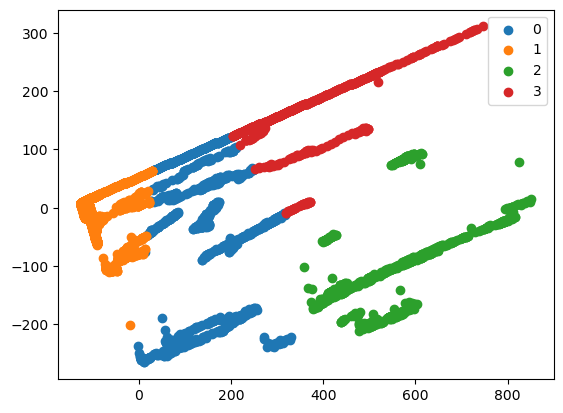

In [54]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

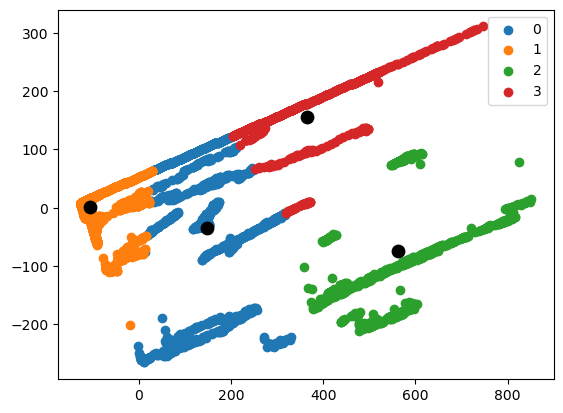

In [55]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

kmeans.cluster_centers_ return an array of centroids locations. 
kmeans.cluster_centers_ return an array of centroids locations.
K-means Clustering is an iterative clustering method that segments data into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid).